### Customer Churn

#### Introduction

Customer churn is a critical challenge faced by many industries, particularly in competitive markets like financial services. It refers to the phenomenon where customers stop using a company's product or service, resulting in lost revenue and increased costs for acquiring new customers. For credit card companies, understanding and predicting churn is essential for retaining valuable customers and optimizing customer engagement strategies.

This project focuses on analyzing customer behavior and building a predictive model to identify customers who are likely to churn. By leveraging historical data from a credit card dataset, we aim to uncover patterns and trends that can help the company take proactive measures to prevent churn.



### Project Objective


The objective of this project is to develop a machine learning model to predict customer churn in the credit card sector. By accurately identifying potential churners, the company can implement targeted retention strategies, thereby reducing churn rates and improving overall customer satisfaction and profitability.

### Preparing Dataset

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
# Loading Customer Churn Dataset
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Exploration and Preprocessing

In [4]:
# Displaying the shape of the dataset (number of rows, number of columns)
df.shape

(10000, 14)

In [5]:
# Displaying dataset information (data types, number of non-null values, columns and rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### From the information on our dataframe:
1. There are no missing values in any of the columns.
2. All columns are numerical (float64 or int64) which is suitable for machine learning models except for 'Surname', 'Gender', 'Geography' which are categorical in nature.

##### Potential Preprocessing Steps:
1. Drop the 'CustomerId', 'Surname', and 'RowNumber' columns as they likely do not provide meaningful information for classification.
2. Encode the 'Geography' and 'Gender' columns to numerical values for model training.
3. Normalise or scale features

In [6]:
# Remove the 'id' and 'Unnamed: 32' columns from the DataFrame
df.drop(['CustomerId', 'Surname', 'RowNumber'], axis =1, inplace = True )

In [7]:
# Generating descriptive statistics of the DataFrame
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Averages values by countries
country_group = df.groupby('Geography').mean(numeric_only = True)
country_group

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


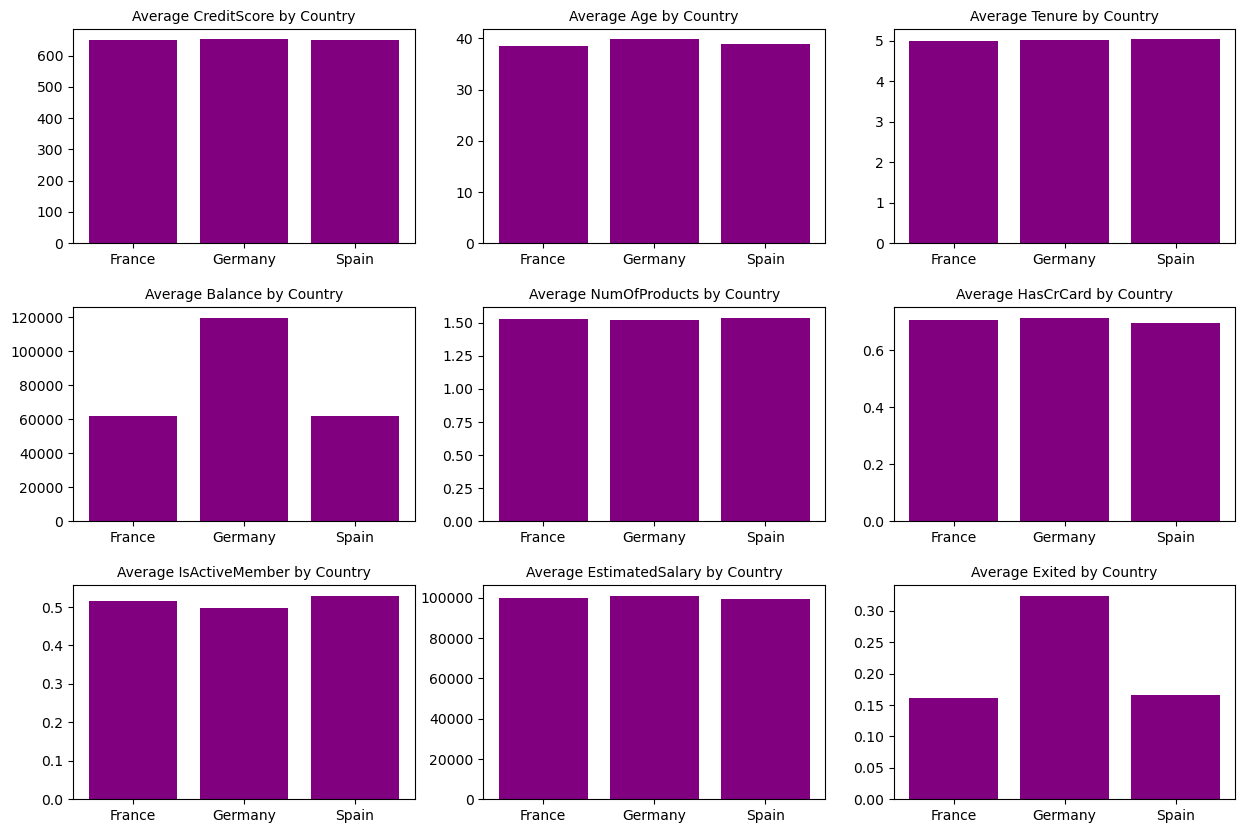

In [9]:
# Visualise Averages values by countries
fig, ax = plt.subplots(3,3,figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(country_group.columns):
    ax[i].bar(x=country_group.index, height=country_group[col], color='purple')
    ax[i].set_title(f'Average {col} by Country', fontsize=10)
    ax[i].tick_params(axis='x', rotation=0) 
    
fig.subplots_adjust(hspace=0.3, wspace=0.2)
  

In [10]:
# Average values by Gender
gender_group = df.groupby('Gender').mean(numeric_only = True)
gender_group

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


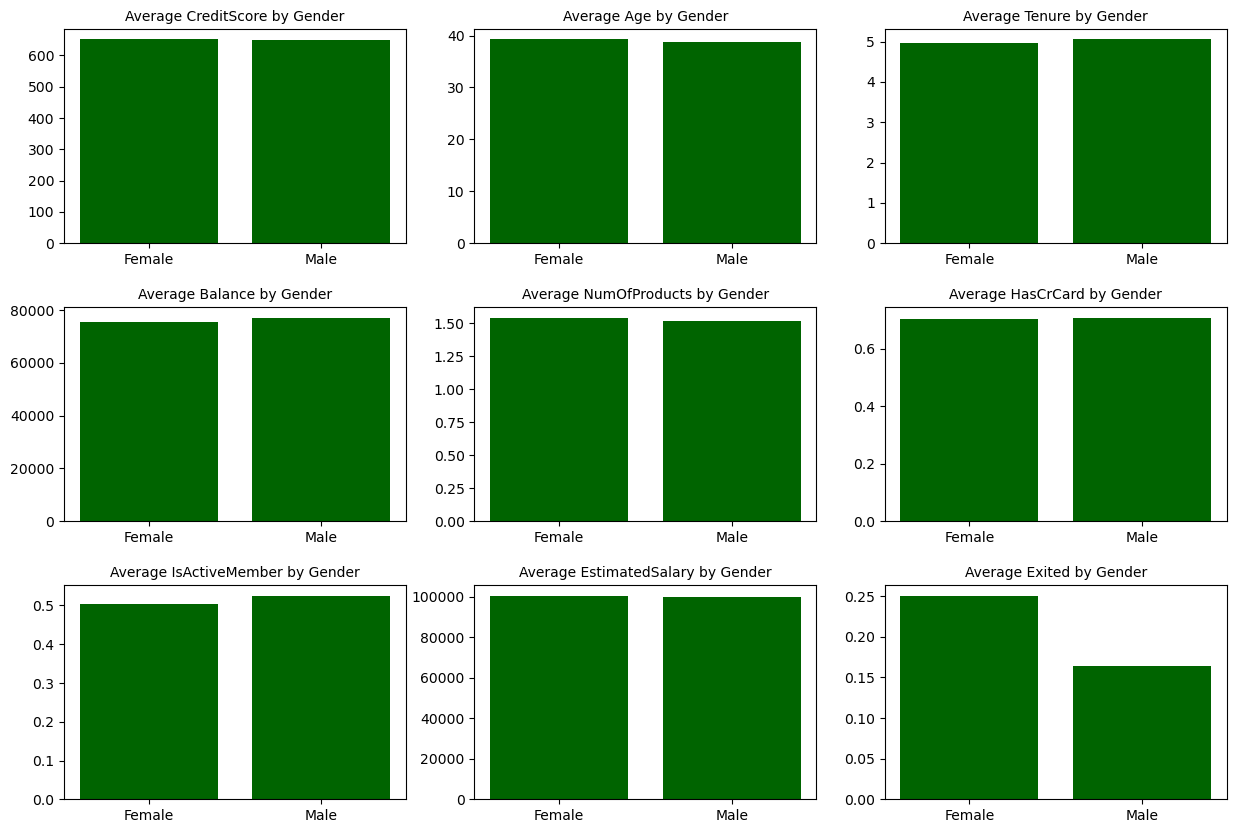

In [11]:
# Visualise Averages values by countries
fig, ax = plt.subplots(3,3,figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(gender_group.columns):
    ax[i].bar(x=gender_group.index, height=gender_group[col], color='darkgreen')
    ax[i].set_title(f'Average {col} by Gender', fontsize=10)
    ax[i].tick_params(axis='x', rotation=0) 
    
fig.subplots_adjust(hspace=0.3, wspace=0.2)

##### Gender

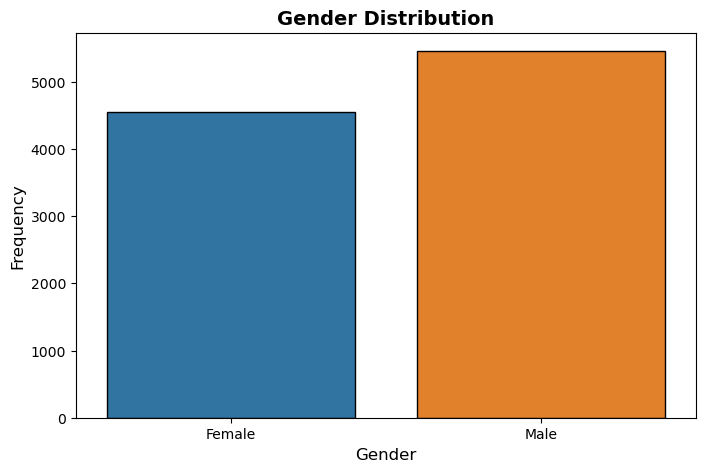

In [12]:
# Visualising Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Gender", edgecolor="black")
plt.title("Gender Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Countries

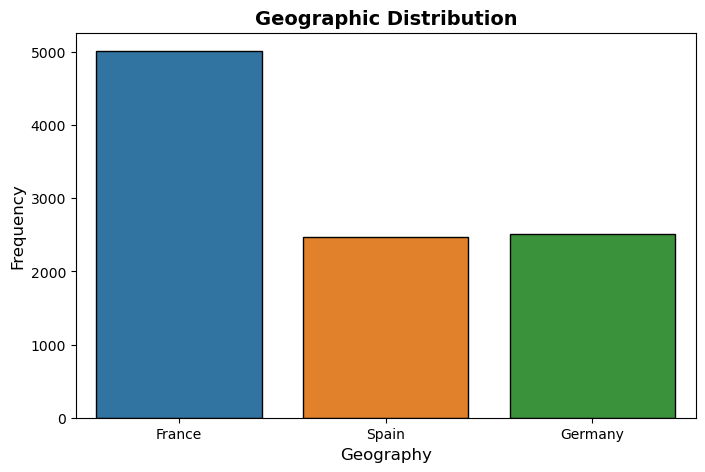

In [13]:
# Visualising Geography
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Geography", hue="Geography", edgecolor="black")
plt.title("Geographic Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Geography", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Exited

In [14]:
# Check the distribution of 'diagnosis' to understand the class balance.
class_distribution = df['Exited'].value_counts(normalize= True)
print(class_distribution * 100)

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


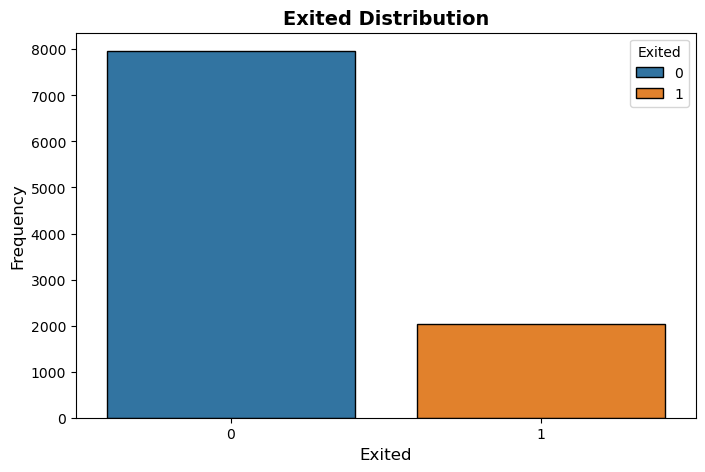

In [15]:
# Visualising Exited
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Exited", hue="Exited", edgecolor="black")
plt.title("Exited Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Exited", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Pairplot

In [16]:
# Create DataFrame for pariplot anlysis
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', "Exited"]
df_pairplot = df[cols]


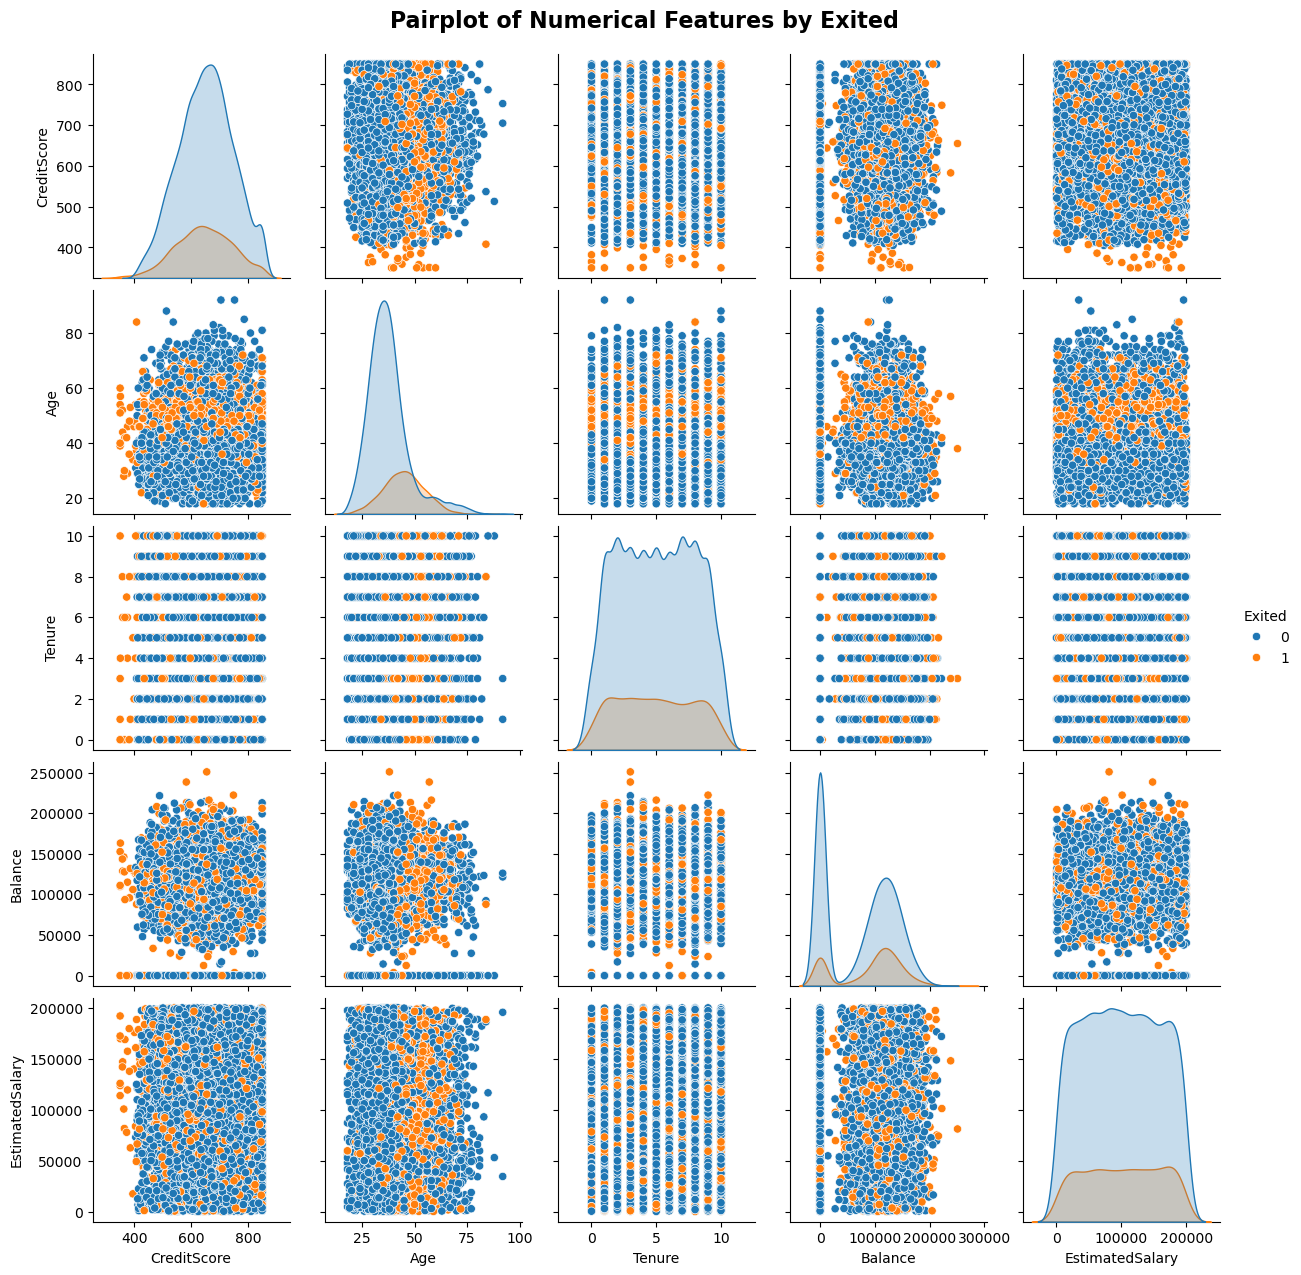

In [17]:
# Pairplot for numerical variables in the dataset
sns.pairplot(df_pairplot, hue="Exited")

# Add a title for the pairplot
plt.suptitle("Pairplot of Numerical Features by Exited", y=1.02, fontsize=16, fontweight="bold")
plt.show()


#### Analysisng Correlations

In [18]:
# Correlation
corr = df.corr(numeric_only=True)
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


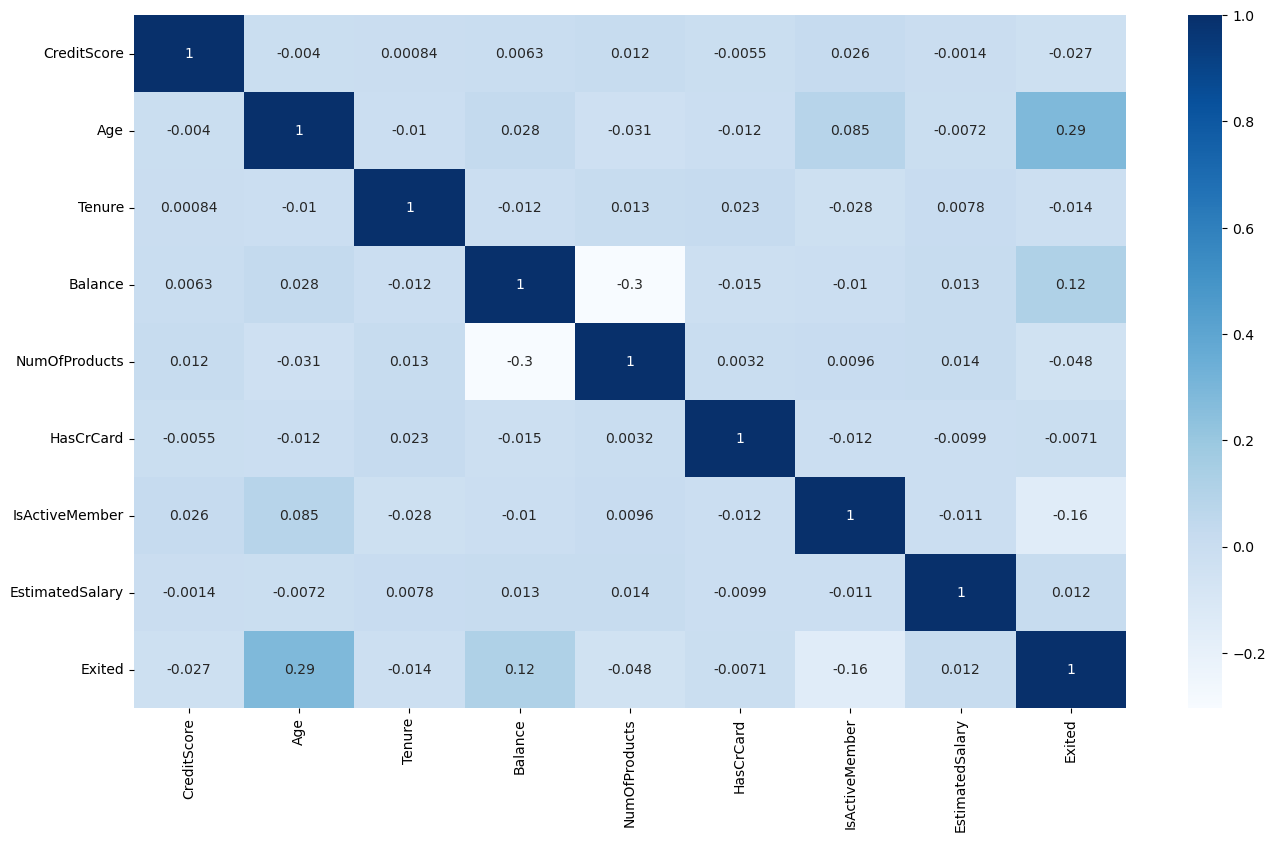

In [19]:
# Correlation HeatMap
plt.figure(figsize=(16,9))
sns.heatmap(corr, cmap = "Blues", annot=True)
plt.show()

### Building Model

In [20]:
# One Hot Encoding the Geography and Gender Columns
df = pd.get_dummies(data=df, drop_first=True, dtype = 'int64')

In [21]:
# Seperating into Target and Features
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [22]:
# Spliting Model into Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Baseline Model

In [24]:
# Majority class baseline
y_pred_baseline = [0] * len(y_test)

# Evaluate accuracy of the baseline
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline accuracy: {baseline_accuracy:.2f}")

Baseline accuracy: 0.80


#### Logistic regression

Accuracy: 81.10%

f1_score: 33.68%

classification_report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000


Confusion Matrix


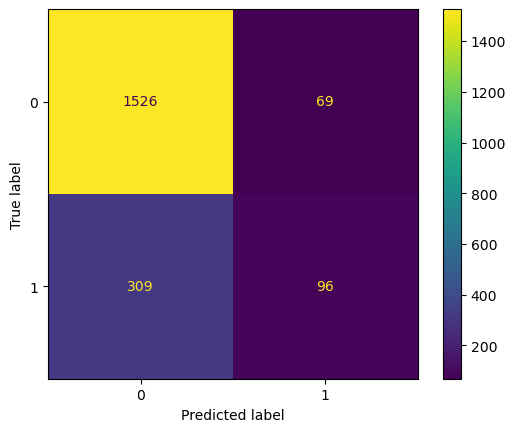

In [25]:
# Fitting Logistic Regression Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicting on X_test
y_pred = lr.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print()

# Evaluation Model (F1_score)
f1 = f1_score(y_test, y_pred)
print(f"f1_score: {f1 * 100:.2f}%")
print()

# Evaluation Model (classification_report)
print("classification_report")
print(classification_report(y_test, y_pred))
print()


print("Confusion Matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, y_pred),display_labels= lr.classes_)
cm_display.plot()
plt.show()

In [26]:
# Cross-Validation lr Model
accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.85 %
Standard Deviation is 0.86 %


#### Random forest Classification Model

Accuracy: 86.70%

f1_score: 61.34%

classification_report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000


Confusion Matrix


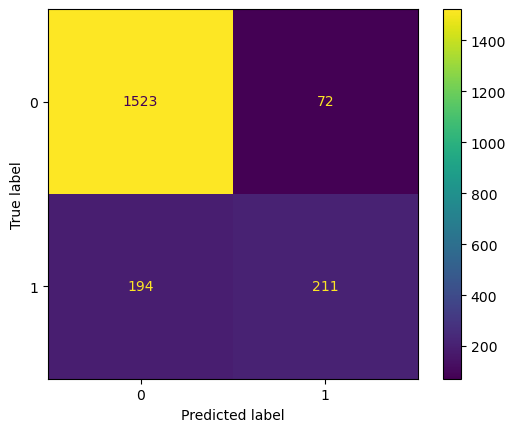

In [27]:
# Fitting RandomForest Classifier Model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predicting on X_test
y_pred = rf.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print()

# Evaluation Model (F1_score)
f1 = f1_score(y_test, y_pred)
print(f"f1_score: {f1 * 100:.2f}%")
print()

# Evaluation Model (classification_report)
print("classification_report")
print(classification_report(y_test, y_pred))
print()


print("Confusion Matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, y_pred),display_labels= lr.classes_)
cm_display.plot()
plt.show()

In [28]:
# Cross Validation Rf model
accuracies = cross_val_score(estimator= rf, X= X_train, y= y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


#### Predicting on Unseen observation

In [29]:
# Creating an observation array
customer_arr = [[619, 42, 2, 0.0, 1, 1, 1, 101348.88, 0, 0, 0]]

# Creating a Df for a Single observation
customer_df = pd.DataFrame(data= customer_arr, columns= X.columns)

In [30]:
# Make Predicition (Logistic Regression)
lr.predict(scaler.transform(customer_df))

array([0], dtype=int64)

In [31]:
# Make Predicition (Random Forest)
rf.predict(scaler.transform(customer_df))

array([1], dtype=int64)